In [1]:
%config InlineBackend.figure_formats = ['svg']
import oscovida as ov

In [2]:
ov.display_binder_link("tutorial-overview-graphs.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/tutorial-overview-graphs.ipynb)

## Overview function explained

The most important function of `oscovida` package is `overview`. It takes the following parameters:
1. `country` — a country to analyse (mandatory, `str`);
2. `region` — a region of the country (optional, `str`);
3. `subregion` — a subregion of the country (optional, `str`);
4. `savefig` — whether to save a sigure (optional, `bool`, default is `False`);
5. `dates` — a range of dates in a format "2020-05-15:2020-10-20"
6. `weeks` — how many last weeks to show (optional, `int`, default is zero, which means "all").

The function returns a triple:
(`pyplot` graph, a `pandas` series for _cases_, a `pandas` series for _deaths_).

This function provides six graphs:

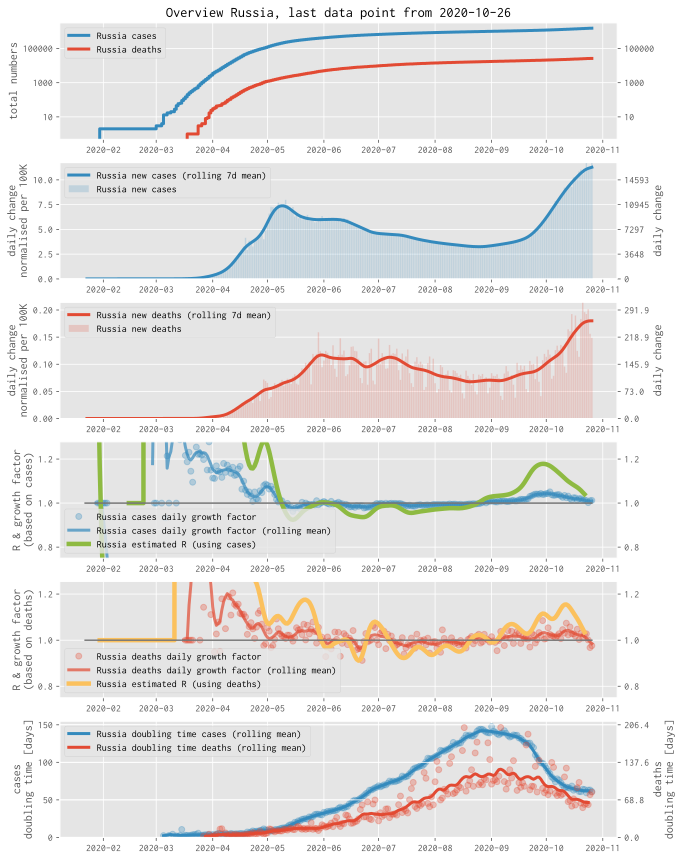

In [3]:
ov.overview('Russia');

Let's see how exactly we obtain all these graphs.

Under the hood we 
* retrieve the data with `get_country_data()` function (see the [tutorial](tutorial-accessing-cases-and-deaths.nbdata.html))
* then we optionally narrow the time range using either `weeks=N` for the last `N` weeks or
  `dates="2020-05-01:2020-10-01"` for the specific range of dates. Note that one cannot use
  both `dates` and `weeks` together.
* finally, we feed this data for *cases* and *deaths* to a set of plotting functions:
 - `plot_time_step` for total numbers (plot 1, see the [tutorial](tutorial-overview-plot_time_step.nbdata.html))
 - `plot_daily_change` for daily changes (plots 2 and 3, see the [tutorial](tutorial-overview-plot_daily_change.nbdata.html))
 - `plot_reproduction_number` for `R`-value and the growth factor (plots 4 and 5, see the [tutorial](tutorial-overview-plot_reproduction_number.nbdata.html))
 - `plot_doubling_time` for the doubling times (plot 6, see the [tutorial](tutorial-overview-plot_doubling_time.nbdata.html)).

That's exactly how we fetch the data using `weeks` inside the `overview` function:

In [4]:
country = "Iran"
weeks = 30
cases, deaths = ov.get_country_data(country)
cases = cases[- weeks * 7:]   # cut off unwanted data
deaths = deaths[- weeks * 7:] # cut off unwanted data

What we have in `cases` and `deaths` are Pandas time series: it is a sort of a two-row array with dates in one row and COVID cases / deaths in the other:

In [5]:
cases

2020-03-31     44605
2020-04-01     47593
2020-04-02     50468
2020-04-03     53183
2020-04-04     55743
               ...  
2020-10-22    550757
2020-10-23    556891
2020-10-24    562705
2020-10-25    568896
2020-10-26    574856
Freq: D, Name: Iran cases, Length: 210, dtype: object

And here is the example with `dates`:

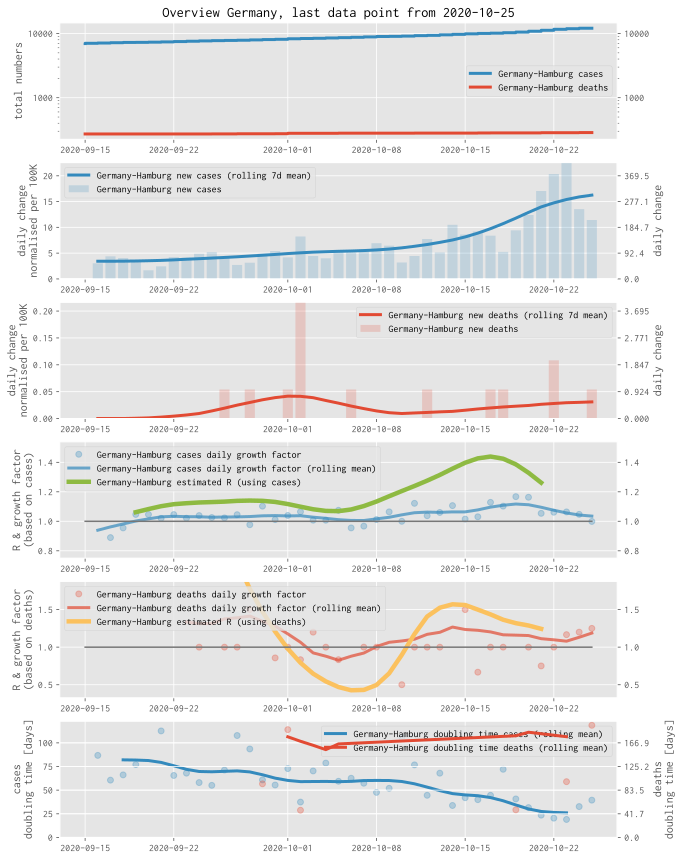

In [6]:
country = "Germany"
region="Hamburg"
dates = "2020-09-15:2020-10-25"
cases, deaths = ov.get_country_data(country, region)

date_start, date_end = dates.split(':')
cases = cases[date_start:date_end]
deaths = deaths[date_start:date_end]

ov.overview(country=country, region=region, dates=dates);

# Other tutorials

You can find [more tutorials here](tag-tutorial.html).